In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from glob import glob

In [2]:
def simple_line_plot(unreal_data_source, gazebo_data_source, theoretical_solution_source, x_label, y_label, destination_path, use_markers = 1, marker_density = [100, 100, 100], x_scaling = 1, y_scaling = 1, y_min_offset = -0.5, y_max_offset = 3, has_theorteical_solution=1):
    # This function takes the path to 3 .csv files representing the data sources, 
    # creates a graph showing the values of the data at x_index and y_index from both sources
    # and saves the plot to a .png file in the folder given by destination_path.
    unreal_indices = get_indices([x_label, y_label], unreal_data_source)
    gazebo_indices = get_indices([x_label, y_label], gazebo_data_source)
    
    unreal_data = np.genfromtxt(unreal_data_source, delimiter=',', skip_header = 1)
    gazebo_data = np.genfromtxt(gazebo_data_source, delimiter=',', skip_header = 1)
    if has_theorteical_solution == 1:
        theoretical_indices = get_indices([x_label, y_label], theoretical_solution_source)
        theoretical_data = np.genfromtxt(theoretical_solution_source, delimiter=',', skip_header = 1)
        y_max = np.amax([np.amax(unreal_data[:, unreal_indices[1]]/y_scaling), np.amax(gazebo_data[:, gazebo_indices[1]]),
                        np.amax(theoretical_data[:, theoretical_indices[1]])])
        y_min = np.amin([np.amin(unreal_data[:, unreal_indices[1]]/y_scaling), np.amin(gazebo_data[:, gazebo_indices[1]]),
                        np.amin(theoretical_data[:, theoretical_indices[1]])])
        plot_markers=['$U$', '$G$', '$T$']
    else:
        y_max = np.amax([np.amax(unreal_data[:, unreal_indices[1]]/y_scaling), np.amax(gazebo_data[:, gazebo_indices[1]])])
        y_min = np.amin([np.amin(unreal_data[:, unreal_indices[1]]/y_scaling), np.amin(gazebo_data[:, gazebo_indices[1]])])
        plot_markers=['$U$', '$G$']
        
    fig = plt.figure(figsize=(10, 6))
    plt.ylim(y_min + y_min_offset, y_max + y_max_offset) 
    
    if use_markers:
        plt.plot(unreal_data[:, unreal_indices[0]]/x_scaling, unreal_data[:, unreal_indices[1]]/y_scaling, 'b', marker='o', markersize=6, markevery=marker_density[0], ls='--', zorder=1, alpha=0.7)
        plt.plot(gazebo_data[:, gazebo_indices[0]], gazebo_data[:, gazebo_indices[1]], 'orange', marker='o', markersize=9, markevery=marker_density[1], ls='--', zorder=0)
        if has_theorteical_solution == 1:
            plt.plot(theoretical_data[:, theoretical_indices[0]], theoretical_data[:, theoretical_indices[1]], 'black', marker='o', markersize=13, markevery=marker_density[2], ls='--', zorder=-1)
    else:
        plt.plot(unreal_data[:, unreal_indices[0]]/x_scaling, unreal_data[:, unreal_indices[1]]/y_scaling, 'b')
        plt.plot(gazebo_data[:, gazebo_indices[0]], gazebo_data[:, gazebo_indices[1]], 'orange', alpha =0.5)
        if has_theorteical_solution == 1:
            plt.plot(theoretical_data[:, theoretical_indices[0]], theoretical_data[:, theoretical_indices[1]], 'black', alpha=0.7)
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    y_label_with_unit = y_label
    if "Velocity" in y_label:
        y_label_with_unit += ' in m/s'
    elif "Position" in y_label:
        y_label_with_unit += ' in meters'

    if "Time" in x_label:
        x_label += ' in seconds'
        
    plt.xlabel(x_label, fontsize=22)
    plt.ylabel(y_label_with_unit, fontsize=22)
    if has_theorteical_solution == 1:
        plt.legend(['Unreal ' + y_label, 'Gazebo ' + y_label, 'Theoretical ' + y_label], fontsize=15, loc='upper right')
    else:
        plt.legend(['Unreal ' + y_label, 'Gazebo ' + y_label], fontsize=15, loc='upper right')
    plt.grid()
    plt.show
    plt.savefig(destination_path + y_label + '.png')
    plt.clf()
    


In [9]:
def get_indices(labels, data_source):
    # This function returns a list of indices corresponding to the index of each entry in the labels array, 
    # ASSSUMING that the .csv files containing UE4 and Gazebo data have the same indices for all labels.
    # It throws a KeyError if any of the labels are not found.
    df = pd.read_csv(data_source)
    indices = []
    for label in labels:
        indices.append(df.columns.get_loc(label))
    return indices

def plot_pattern_results(unreal_data_source, gazebo_data_source, x_label, y_label, last_pattern_number, destination_path):
    # This function plots the result of the force pattern experiments according to the x_label and y_label received. 
    # It expects to receive 2 paths to folders that contain .csv files named Pattern_1 to Pattern_(last_pattern_number).
    # It then saves the plots to the folder given by destination_path.
    
    for index in range (1, last_pattern_number + 1):
        crt_pattern_unreal_source = unreal_data_source + 'Pattern_' + str(index) + ".csv"
        crt_pattern_gazebo_source = gazebo_data_source + 'Pattern_' + str(index) + ".csv"
        if index == 4:
            y_max_offset = 15
            y_min_offset = -0.5
            marker_frequency=[24, 400]
        elif index == 3:
            y_max_offset = 3.5
            y_min_offset = -0.2
            marker_frequency=[24, 400]
        elif index == 2:
            y_max_offset = 1.5
            y_min_offset = -0.2
            marker_frequency=[24, 400]
        else:
            y_max_offset = 0.05
            y_min_offset = -0.02
            marker_frequency=[200, 400]
            
        simple_line_plot(crt_pattern_unreal_source, crt_pattern_gazebo_source, '', x_label, y_label, destination_path + 'Pattern_' + str(index) + '_', 1, marker_frequency, 1, 1, y_min_offset, y_max_offset, 0)

def plot_gravity_results(unreal_data_source, gazebo_data_source, theoretical_solution_source, x_label, y_label, destination_path):
    # This function plots the results of the gravity drop test experiment according to the received x_label and y_label.
    # It then saves the plots to the folder given by destination_path.
    simple_line_plot(unreal_data_source, gazebo_data_source, theoretical_solution_source, x_label, y_label, destination_path, 1, [100, 100, 100], 1, 100)
    
def plot_constant_force_results(unreal_data_source, gazebo_data_source, theoretical_data_source, x_label, y_label, forces_used, destination_path):
    # This function plots the results applying different constant according to the received x_label and y_label.
    # It expects to receive 3 paths to folders that contain .csv files named Force 1 to Force n(where n is the index of the last force used).
    # It then saves the plots to the folder given by destination_path.
    n = len(forces_used)
    for index in range (1, n + 1):
        crt_unreal_source = unreal_data_source + "Force " + str(index) + ".csv"
        crt_gazebo_source = gazebo_data_source + "Force " + str(index) + ".csv"
        crt_theoretical_source = theoretical_data_source + "Force " + str(index) + ".csv"
        if index == 1:
            y_min_offset = -0.75
            y_max_offset = 30
            marker_frequency = [400, 390, 390]
        else:
            y_min_offset = -9
            y_max_offset = 100
            marker_frequency = [20, 400, 400]
        simple_line_plot(crt_unreal_source, crt_gazebo_source, crt_theoretical_source, x_label, y_label, destination_path + 'Force ' + str(index)+" ", 1, marker_frequency, 1, 1, y_min_offset, y_max_offset) 

def plot_impulse_results(unreal_data_source, gazebo_data_source, theoretical_solution_source, x_label, y_label, impulses_used, destination_path, marker_frequency, plot_diff = 0):
    # This function plots the results of the different impulses used accordig to the received x_label and y_label.
    # It expects to receive 3 paths to folders that contain .csv files named xN.csv(where x is the magnitude of the impulse used).
    # It then saves the plots to the folder given by destination_path.
    # It also plots the differences between the unreal and gazebo data and the theoretical solutions
    n = len(impulses_used)
    for index in range (0, n):
        crt_unreal_source = unreal_data_source + str(impulses_used[index]) + "N.csv"
        crt_gazebo_source = gazebo_data_source + str(impulses_used[index]) + "N.csv"
        crt_theoretical_solution_source = theoretical_solution_source + str(impulses_used[index]) + "N.csv"
        if plot_diff != 0:
            plot_differences(crt_unreal_source, crt_gazebo_source, crt_theoretical_solution_source, x_label, y_label, destination_path + str(impulses_used[index]) + "N_Impulse_", 100)
            plot_differences(crt_unreal_source, crt_gazebo_source, crt_theoretical_solution_source, x_label, y_label, destination_path + str(impulses_used[index]) + "N_Impulse_", 100)
        
        simple_line_plot(crt_unreal_source, crt_gazebo_source, crt_theoretical_solution_source, x_label, y_label, destination_path + str(impulses_used[index]) + "N_Impulse_", 1, marker_frequency, 1, 100) 

In [3]:
def plot_differences(unreal_data_source, gazebo_data_source, theoretical_solution_source, x_label, y_label, destination_path, y_scaling):
    # This function plots the differences between the unreal data and the theoretical data in one plot
    # and the differences between the gazebo data and the theoretical data in one plot based on x_label and y_label
    # and saves the plots in one figure at destination_path
    unreal_indices = get_indices([x_label, y_label], unreal_data_source)
    gazebo_indices = get_indices([x_label, y_label], gazebo_data_source)
    theoretical_indices = get_indices([x_label, y_label], theoretical_solution_source)

    unreal_data = np.genfromtxt(unreal_data_source, delimiter=',', skip_header = 1)
    gazebo_data = np.genfromtxt(gazebo_data_source, delimiter=',', skip_header = 1)
    theoretical_data = np.genfromtxt(theoretical_solution_source, delimiter=',', skip_header = 1)
    
    unreal_data[:, unreal_indices[1]] = unreal_data[:, unreal_indices[1]]/y_scaling - theoretical_data[:, theoretical_indices[1]]
    gazebo_data[:, gazebo_indices[1]] = gazebo_data[:, gazebo_indices[1]] - theoretical_data[:, theoretical_indices[1]]

    total_unreal_error = 0

    for item in unreal_data[:, unreal_indices[1]]:
        if item < 0:
            total_unreal_error += -1*item
        else:
            total_unreal_error += item
    total_gazebo_error = 0
    for item in gazebo_data[:, gazebo_indices[1]]:
        if item < 0:
            total_gazebo_error += -1*item
        else:
            total_gazebo_error += item
    print("Total Unreal error", total_unreal_error)
    print("Total Gazebo error", total_gazebo_error)
    
    y_max = np.amax([np.amax(unreal_data[:, unreal_indices[1]]), np.amax(gazebo_data[:, gazebo_indices[1]])])
    y_min = np.amin([np.amin(unreal_data[:, unreal_indices[1]]), np.amin(gazebo_data[:, gazebo_indices[1]])])

    fig = plt.figure(figsize=(10, 8))
    #plt.ylim(y_min - 0.3, y_max + 0.5) 
    
 
    plt.plot(unreal_data[:, unreal_indices[0]], unreal_data[:, unreal_indices[1]], 'b')
    plt.plot(gazebo_data[:, gazebo_indices[0]], gazebo_data[:, gazebo_indices[1]], 'orange')
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    y_label_with_unit = y_label
    if "Velocity" in y_label:
        y_label_with_unit += ' in m/s'
    elif "Position" in y_label:
        y_label_with_unit += ' in meters'

    if "Time" in x_label:
        x_label += ' in seconds'
        
    plt.xlabel(x_label, fontsize=22)
    plt.ylabel(y_label_with_unit, fontsize=22)
    plt.legend(['Unreal ' + y_label + ' Difference', 'Gazebo ' + y_label + ' Difference'], fontsize=15, loc='upper right')
    plt.grid()
    plt.show
    plt.savefig(destination_path + y_label + '_Difference.png')
    plt.clf()

In [27]:
# Plot gravity drop results
plot_destination = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Gravity Drop Test\\10 Meters\\'
unreal_data_source = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Gravity Drop Test\\10 Meters\\Unreal Results\\Gravity_Drop_Test_Observations.csv'
gazebo_data_source = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Gravity Drop Test\\10 Meters\\Gazebo Results\\Gravity_Drop_Test_Observations.csv'
theoretical_solution_source = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Gravity Drop Test\\10 Meters\\Theoretical Results\\Gravity_Drop_Test_Observations.csv'

plot_gravity_results(unreal_data_source, gazebo_data_source, theoretical_solution_source, 'Time', 'Z Velocity', plot_destination)
plot_gravity_results(unreal_data_source, gazebo_data_source, theoretical_solution_source, 'Time', 'Z Position', plot_destination)

plot_differences(unreal_data_source, gazebo_data_source, theoretical_solution_source, 'Time', 'Z Velocity', plot_destination, 100)
plot_differences(unreal_data_source, gazebo_data_source, theoretical_solution_source, 'Time', 'Z Position', plot_destination, 100)

Total Unreal error 12.383493729999998
Total Gazebo error 19.33828784958455
Total Unreal error 4.7438784199999855
Total Gazebo error 9.758428039999982


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [104]:
# Plot constant force results
unreal_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Constant Force\\Unreal Results\\'
gazebo_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Constant Force\\Gazebo Results\\'
theoretical_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Constant Force\\Theoretical Results\\'

forces_used = [10, 20]

plot_constant_force_results(unreal_dir_name, gazebo_dir_name, theoretical_dir_name, 'Time', 'Y Velocity', forces_used, unreal_dir_name)
plot_constant_force_results(unreal_dir_name, gazebo_dir_name, theoretical_dir_name, 'Time', 'Y Position', forces_used, unreal_dir_name)

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [19]:
# Plot impulse results
impulses_used = [1000, 10000]

# Neglecting friction
unreal_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Impulse\\Neglecting_Friction\\Unreal Results\\'
gazebo_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Impulse\\Neglecting_Friction\\Gazebo Results\\'
theoretical_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Impulse\\Neglecting_Friction\\Theoretical Results\\'

plot_impulse_results(unreal_dir_name, gazebo_dir_name, theoretical_dir_name, 'Time', 'Y Velocity', impulses_used, unreal_dir_name, [200, 200, 200], 1)
plot_impulse_results(unreal_dir_name, gazebo_dir_name, theoretical_dir_name, 'Time', 'Y Position', impulses_used, unreal_dir_name, [200, 200, 200], 1)


# Including friction
unreal_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Impulse\\Including_Friction\\Unreal Results\\'
gazebo_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Impulse\\Including_Friction\\Gazebo Results\\'
theoretical_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Impulse\\Including_Friction\\Theoretical Results\\'

plot_impulse_results(unreal_dir_name, gazebo_dir_name, theoretical_dir_name, 'Time', 'Y Velocity', impulses_used, unreal_dir_name, [20, 340, 340])
plot_impulse_results(unreal_dir_name, gazebo_dir_name, theoretical_dir_name, 'Time', 'Y Position', impulses_used, unreal_dir_name, [20, 340, 340])

Total Unreal error 0.00031991999983160824
Total Gazebo error 0.0
Total Unreal error 0.00031991999983160824
Total Gazebo error 0.0
Total Unreal error 9.00243938999583
Total Gazebo error 0.0
Total Unreal error 9.00243938999583
Total Gazebo error 0.0
Total Unreal error 0.5614899200000013
Total Gazebo error 0.0
Total Unreal error 0.5614899200000013
Total Gazebo error 0.0
Total Unreal error 0.0
Total Gazebo error 0.0
Total Unreal error 0.0
Total Gazebo error 0.0


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [3]:
# Plot force patterns used
gazebo_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Force Patterns\\Time Based Approach\\Results Data\\Gazebo Results\\'
 
for index in range (1, 5):
    data_source = gazebo_dir_name + 'Pattern_' + str(index) + ".csv"
    data = np.genfromtxt(data_source, delimiter=',', skip_header = 1)
    if index > 2:
        y_max = 25
    else:
        y_max = 13
    fig = plt.figure(figsize=(10, 6))
    plt.ylim(-0.7, y_max) 
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.plot(data[0:4085, 0], data[0:4085, 14], linewidth=3.5, color='b')        
    plt.xlabel("Time in seconds", fontsize=22)
    plt.ylabel("Force in N", fontsize=22)
    plt.legend(['Force applied to the cube'], fontsize=15, loc='upper right')
    plt.grid()
    plt.show
    plt.savefig('D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Force Patterns\\Time Based Approach\\Results Data\\Gazebo Results\\Force_' + str(index) + '.png')
    plt.clf()


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [123]:
# Plot Time-based force pattern results
unreal_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Force Patterns\\Time Based Approach\\Results Data\\Unreal Results\\'
gazebo_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Force Patterns\\Time Based Approach\\Results Data\\Gazebo Results\\'

plot_pattern_results(unreal_dir_name, gazebo_dir_name, 'Time', 'Y Velocity', 4, unreal_dir_name)
plot_pattern_results(unreal_dir_name, gazebo_dir_name, 'Time', 'Y Position', 4, unreal_dir_name)

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [61]:
# Plot Tick-based force pattern results
unreal_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Force Patterns\\Same Tick Duration Approach\\Results Data\\Unreal Results\\'
gazebo_dir_name = 'D:\\University\\Final Year Project\\GitHub\\Preliminary Work\\Results\\Force Patterns\\Same Tick Duration Approach\\Results Data\\Gazebo World Solver Results\\'

plot_pattern_results(unreal_dir_name, gazebo_dir_name, 'Time', 'Y Velocity', 4, unreal_dir_name)
plot_pattern_results(unreal_dir_name, gazebo_dir_name, 'Time', 'Y Position', 4, unreal_dir_name)
plot_pattern_results(unreal_dir_name, gazebo_dir_name, 'Time', 'Y Force Applied', 4, unreal_dir_name)

<Figure size 432x288 with 0 Axes>

In [4]:
def three_line_plot(data_source, x_label, y_title, y_labels, destination_fille_path, x_scaling = 1, y_scaling=1):
    # This function takes a data source as a .csv file and plots all the data found in every entry of the y_indices array
    # against the x_index provided. It saves the created figure to the destination_path.
    data = np.genfromtxt(data_source, delimiter=',', skip_header = 1)
    y_indices = get_indices(y_labels, data_source)    
    x_index = get_indices([x_label], data_source)[0]
    for ix in range (0, len(y_labels)):
        plt.plot(data[:, x_index]/x_scaling, data[:, y_indices[ix]]/y_scaling)
        
    plt.xlabel(x_label)
    plt.ylabel(y_title)
    plt.title(y_title + ' over ' + x_label)
    plt.grid()
    plt.legend(y_labels)
    plt.savefig(destination_fille_path + '.png')
    plt.clf()
    
def compute_maximum_magnitude(labels, data_source):
    # This function computes the maximum magnitude of the vector obtained by taking each element of each column specified by the labels array.
    data = np.genfromtxt(data_source, delimiter=',', skip_header = 1)
    indices = get_indices(labels, data_source)
    max_magnitude = 0.0
    for row in range (0, len(data)):
        vector_values = []
        for index in indices:
            vector_values.append(data[-1, index])
        if np.linalg.norm(vector_values) > max_magnitude:
            max_magnitude = np.linalg.norm(vector_values)
    return max_magnitude

In [8]:
def plot_formatted_errors(isComplex, useAllData, error_labels, y_label, destination_path):
    # This function plots results from the first benchmark in a formatted way.
    # Based on the error_labels passed, it computes the MAXIMUM magnitude of the vector obtained by putting the corresponding values of error_labels in one vector.
    if isComplex == 1:
        unreal_data_dir = 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Complex Scenario\\'
        gazebo_data_dir = 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Gazebo results\\Complex Scenario\\'
        y_min_offset = -0.1
        y_max_offset = 1
    else:
        unreal_data_dir = 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Simple Scenario\\'
        gazebo_data_dir = 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Gazebo results\\Simple Scenario\\'
        y_min_offset = -0.05
        y_max_offset = 0.15
    
    # The useAllData parameter is used because UE4 tends to have a very bad performance as frame duration increases, which prevents
    # the observation of any interesting pattern. Therefore setting it to 0 will only use the frame durations in which UE4 performs
    # similarly well to the other engines so that a comparison can be made.
    if useAllData == 1:
        frame_durations_used = ['0.012820', '0.017820', '0.022820', '0.027820', '0.032820', '0.037820', '0.042820', '0.047820', '0.052820']
    else:
        frame_durations_used = ['0.012820', '0.017820', '0.022820', '0.027820', '0.032820']
        
    gazebo_engines = ['ode', 'bullet', 'simbody']
    unreal_results = [0 for i in range(len(frame_durations_used))]
    gazebo_results = [[0 for i in range(len(frame_durations_used))] for j in range (len(gazebo_engines))]
    gazebo_data_files = sorted(glob(gazebo_data_dir + '*.csv'))

    # Get the data
    for col_index, frame_duration in enumerate (frame_durations_used):
        # Get the unreal results
        unreal_data_source = unreal_data_dir + frame_duration + '\\Benchmark_01_ExperimentalCube0.csv'
        unreal_results[col_index] = compute_maximum_magnitude(error_labels, unreal_data_source)
        # Get the gazebo results
        for row_index, engine in enumerate (gazebo_engines):
            gazebo_data_aux = list(filter(lambda x: engine in x, gazebo_data_files))
            gazebo_data_source = list(filter(lambda x: str(frame_duration) in x, gazebo_data_aux))
            gazebo_results[row_index][col_index] = compute_maximum_magnitude(error_labels, gazebo_data_source[0])
    
    y_max = np.amax([unreal_results, gazebo_results[0], gazebo_results[1], gazebo_results[2]])
    y_min = np.amin([unreal_results, gazebo_results[0], gazebo_results[1], gazebo_results[2]])

  
    # Plot the obtained data
    plot_markers=['$O$', '$B$', '$S$']
    fig = plt.figure(figsize=(14, 10))
    #plt.ylim(y_min + y_min_offset, y_max + y_max_offset) 
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    
    y_label_with_unit = y_label
    if "Velocity" in y_label:
        y_label_with_unit += ' in m/s'
    elif "Position" in y_label:
        y_label_with_unit += ' in meters'
    elif "Energy" in y_label:
        y_label_with_unit += ' in J'
    elif "Angular" in y_label:
        y_label_with_unit += ' in N⋅m⋅s'
    
    for ix in range (0, len(gazebo_engines)):
        plt.plot(frame_durations_used, gazebo_results[ix], marker=plot_markers[ix], markersize=20.0, ls='--')
    plt.plot(frame_durations_used, unreal_results, marker='$U$', markersize=20.0, ls='--')

    plt.xlabel('Frame duration in seconds', fontsize=22)
    plt.ylabel(y_label_with_unit, fontsize=22)
    #plt.title(y_label + ' over frame duration', fontsize=22)
    plt.grid()

    plt.legend(['ODE','Bullet','Simbody','Unreal'], fontsize=22, loc='upper right')
    plt.savefig(destination_path + '.png')
    plt.show()
    plt.clf()

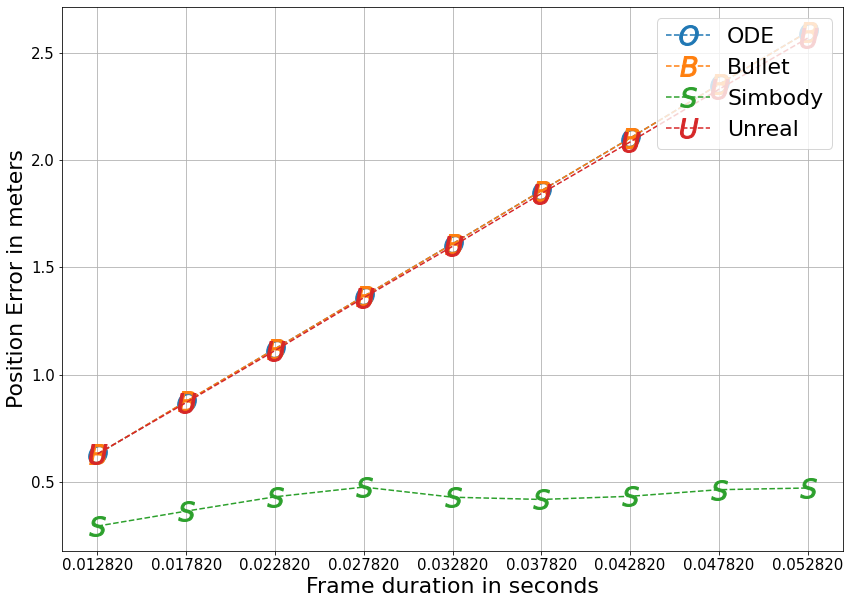

<Figure size 432x288 with 0 Axes>

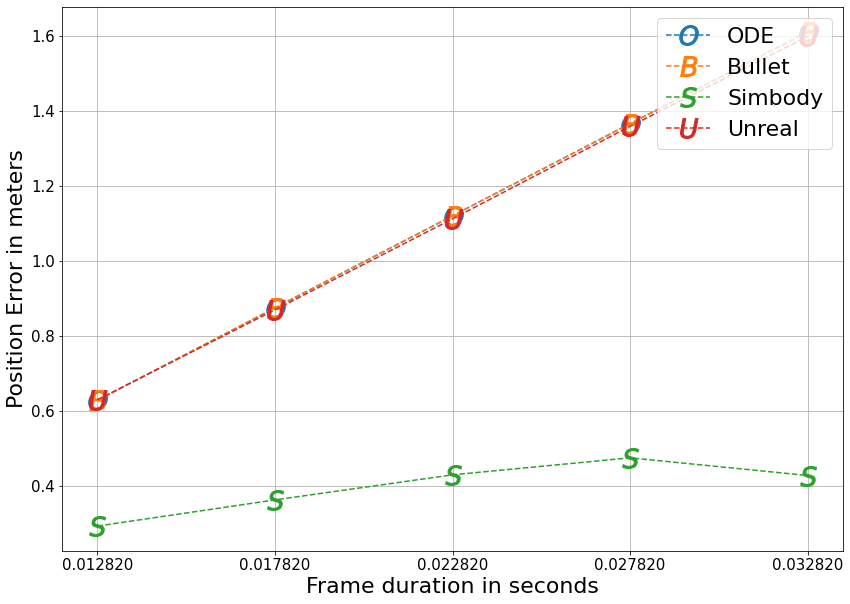

<Figure size 432x288 with 0 Axes>

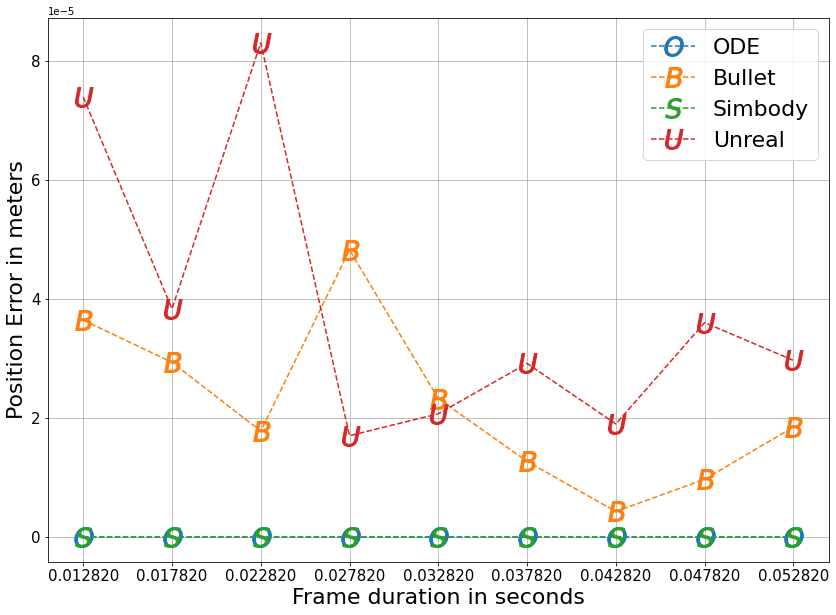

<Figure size 432x288 with 0 Axes>

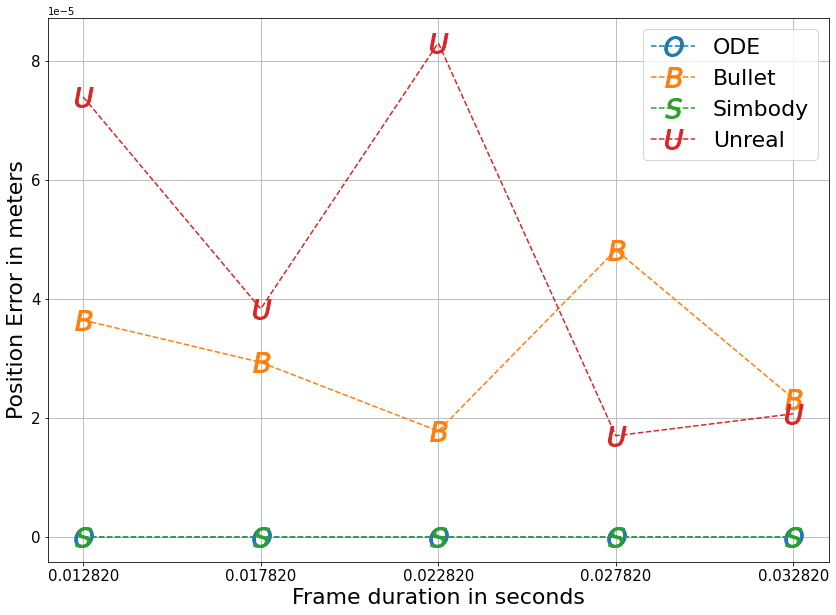

<Figure size 432x288 with 0 Axes>

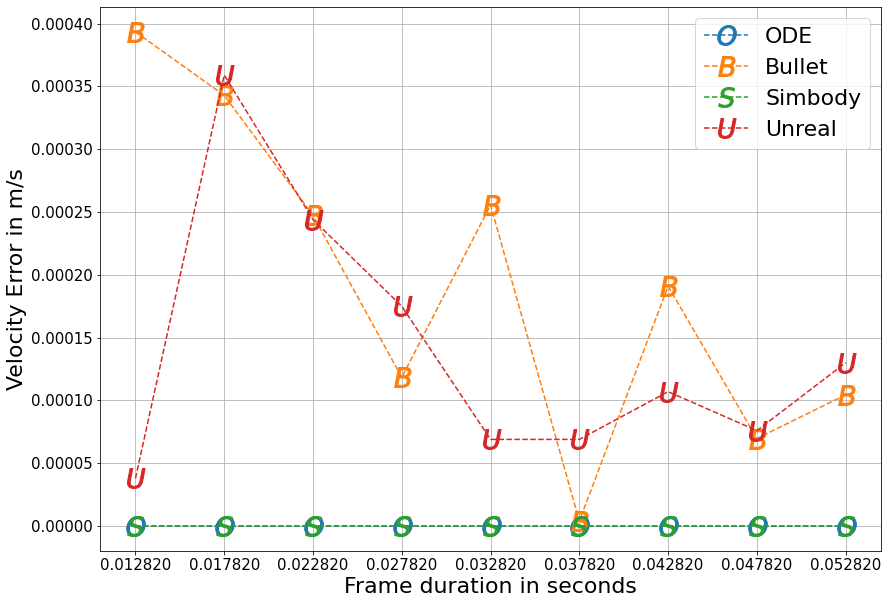

<Figure size 432x288 with 0 Axes>

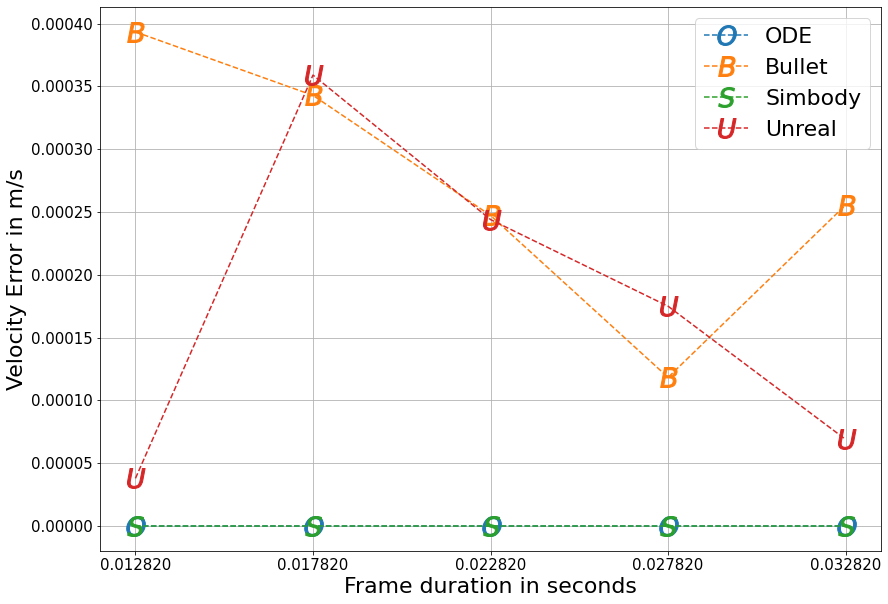

<Figure size 432x288 with 0 Axes>

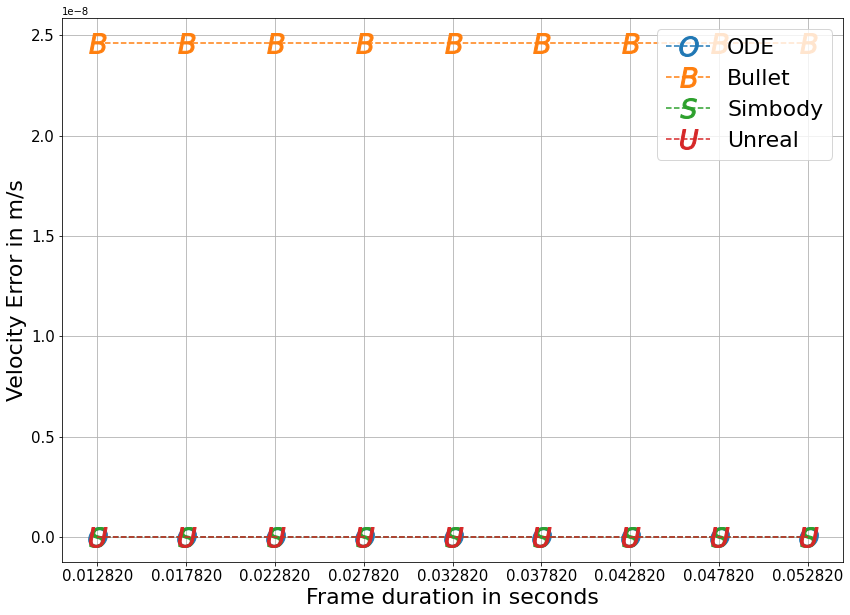

<Figure size 432x288 with 0 Axes>

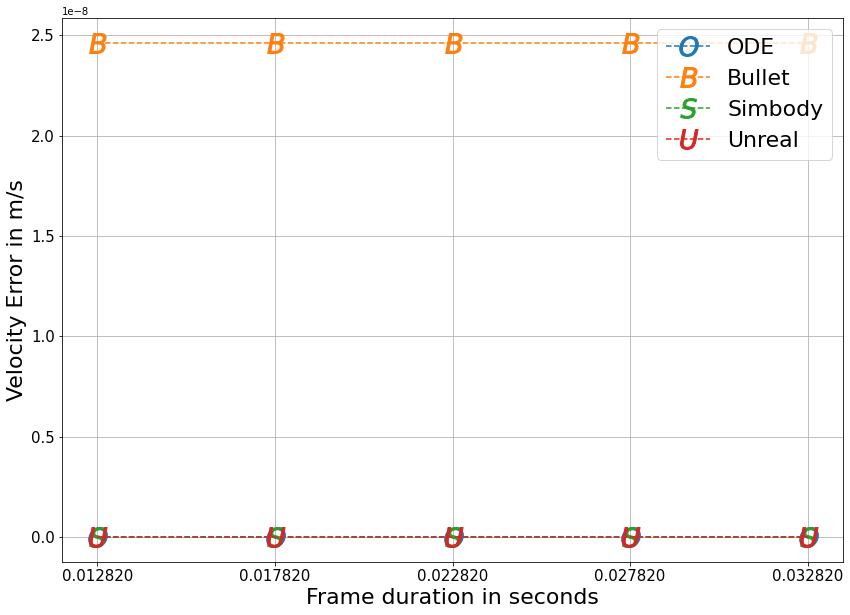

<Figure size 432x288 with 0 Axes>

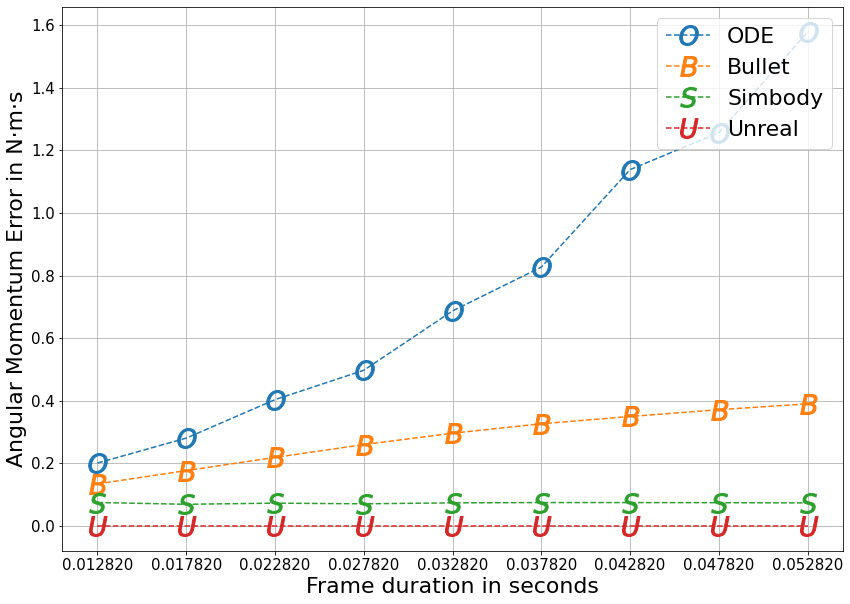

<Figure size 432x288 with 0 Axes>

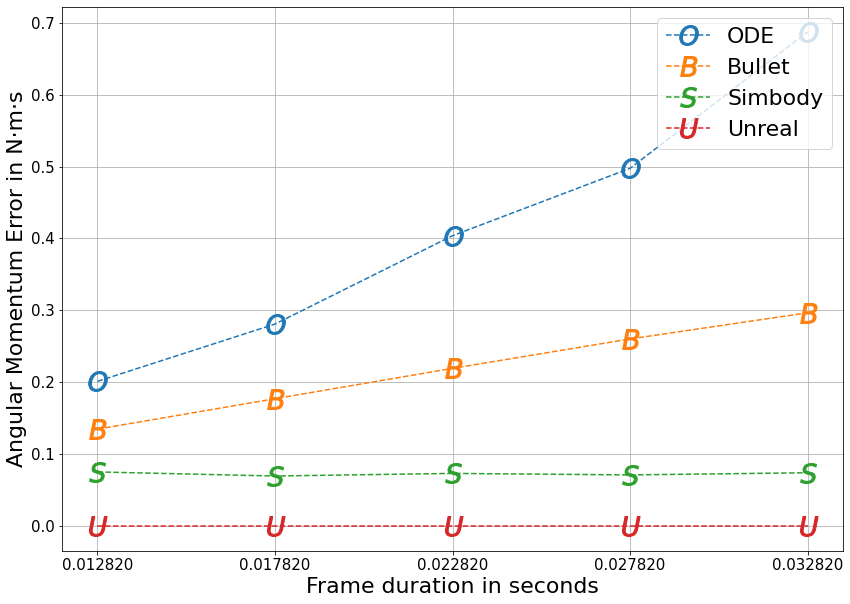

<Figure size 432x288 with 0 Axes>

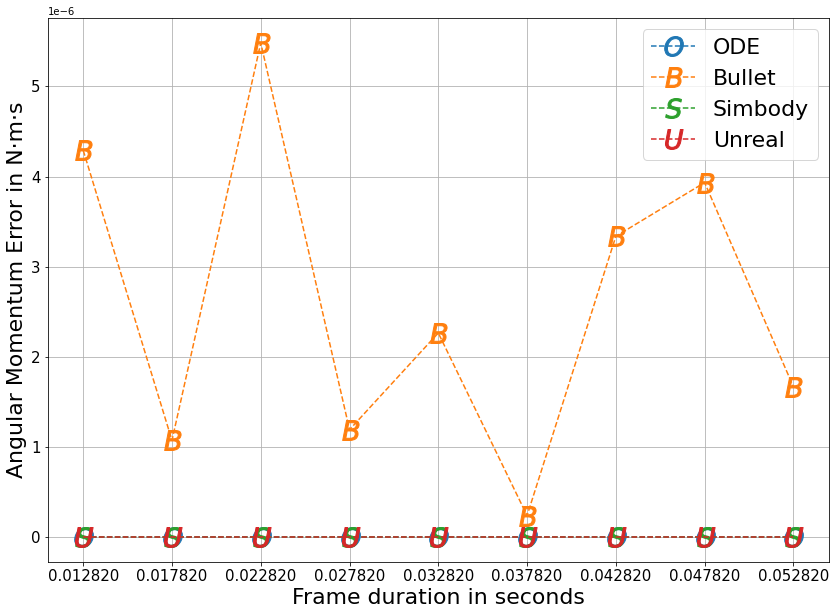

<Figure size 432x288 with 0 Axes>

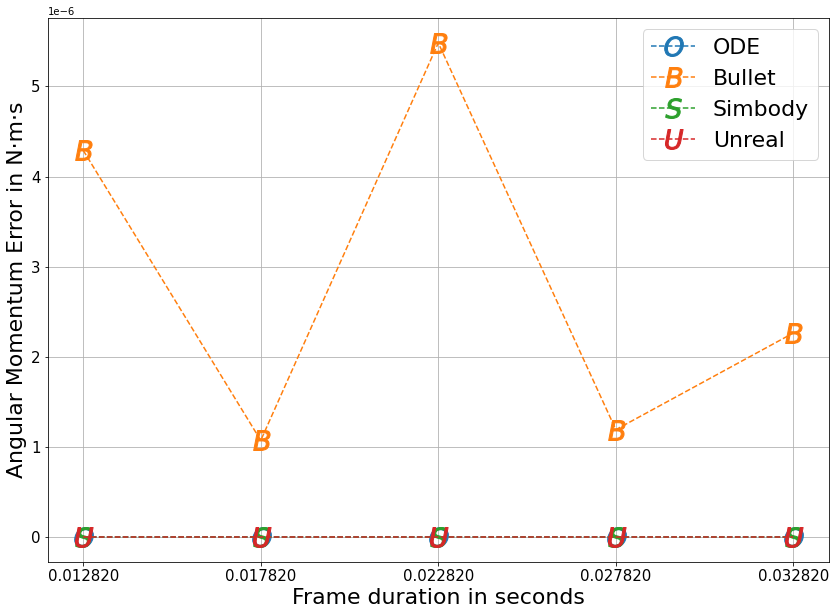

<Figure size 432x288 with 0 Axes>

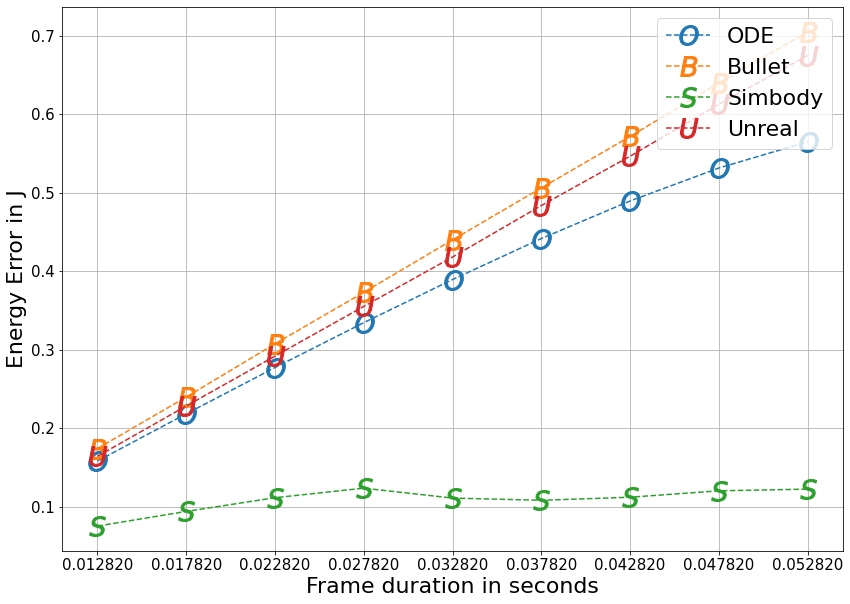

<Figure size 432x288 with 0 Axes>

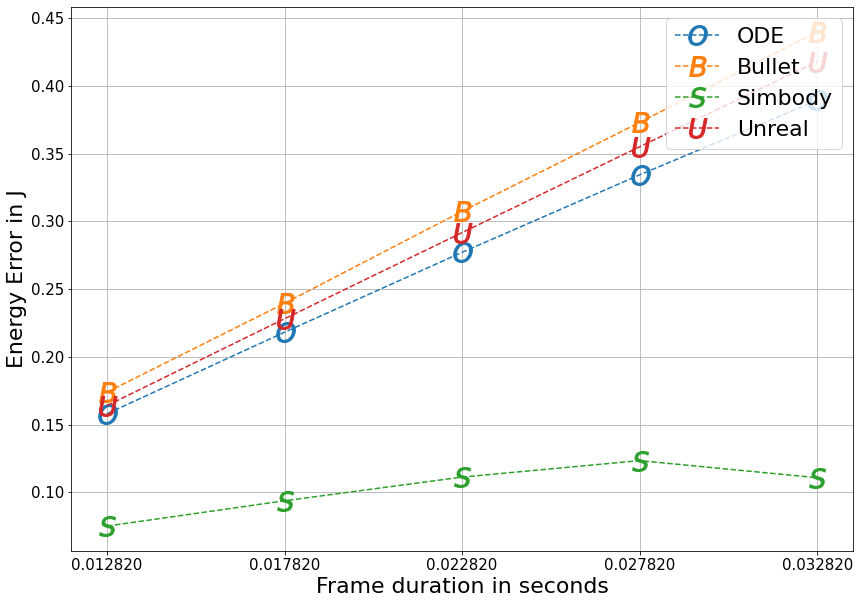

<Figure size 432x288 with 0 Axes>

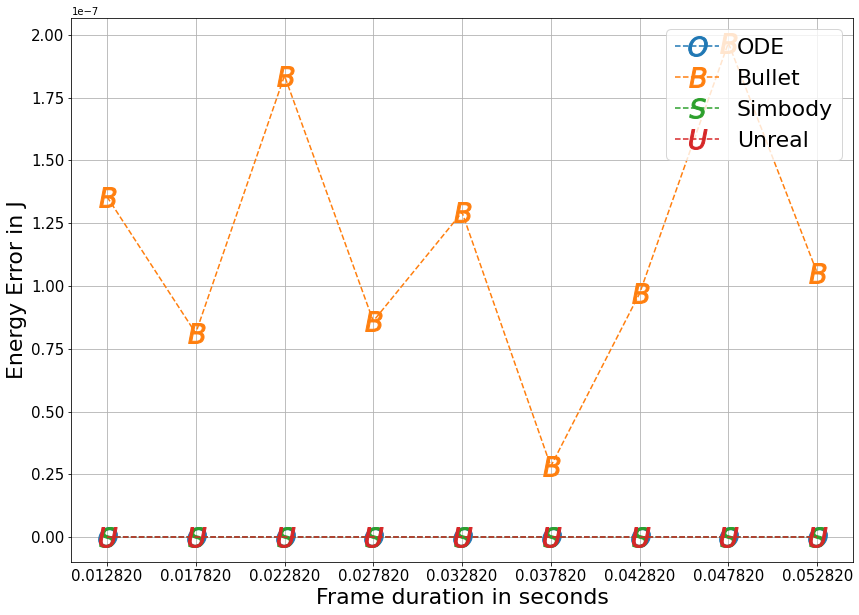

<Figure size 432x288 with 0 Axes>

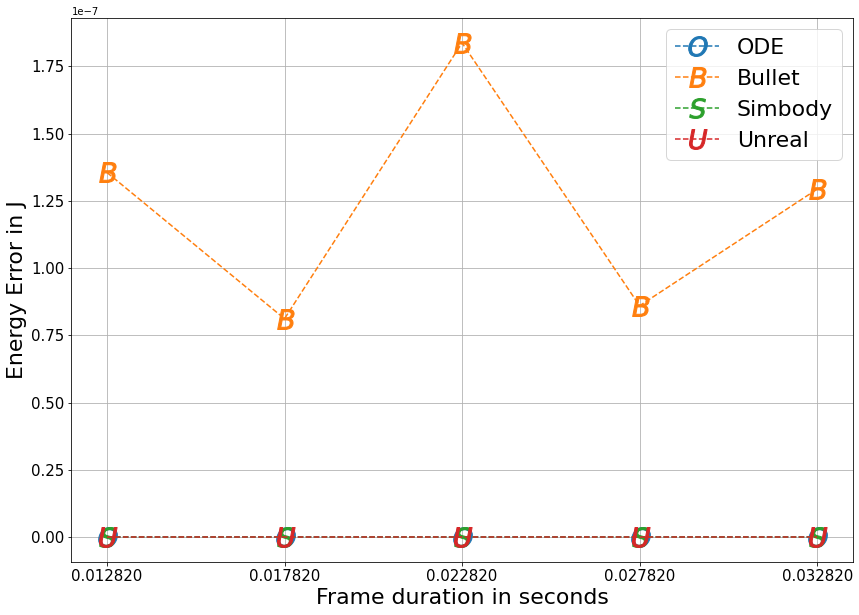

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot Position Error
plot_formatted_errors(1, 1, ['X Position Error', 'Y Position Error', 'Z Position Error'], 'Position Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Complex Scenario\\Position_Error_AllData')
plot_formatted_errors(1, 0, ['X Position Error', 'Y Position Error', 'Z Position Error'], 'Position Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Complex Scenario\\Position_Error_PartialData')

plot_formatted_errors(0, 1, ['X Position Error', 'Y Position Error', 'Z Position Error'], 'Position Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Simple Scenario\\Position_Error_AllData')
plot_formatted_errors(0, 0, ['X Position Error', 'Y Position Error', 'Z Position Error'], 'Position Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Simple Scenario\\Position_Error_PartialData')

# Plot Velocity Error
plot_formatted_errors(1, 1, ['X Velocity Error', 'Y Velocity Error', 'Z Velocity Error'], 'Velocity Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Complex Scenario\\Velocity_Error_AllData')
plot_formatted_errors(1, 0, ['X Velocity Error', 'Y Velocity Error', 'Z Velocity Error'], 'Velocity Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Complex Scenario\\Velocity_Error_PartialData')

plot_formatted_errors(0, 1, ['X Velocity Error', 'Y Velocity Error', 'Z Velocity Error'], 'Velocity Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Simple Scenario\\Velocity_Error_AllData')
plot_formatted_errors(0, 0, ['X Velocity Error', 'Y Velocity Error', 'Z Velocity Error'], 'Velocity Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Simple Scenario\\Velocity_Error_PartialData')

# Plot Angular Momentum Error
plot_formatted_errors(1, 1, ['X Angular Momentum Error', 'Y Angular Momentum Error', 'Z Angular Momentum Error'], 'Angular Momentum Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Complex Scenario\\Angular_Momentum_Error_AllData')
plot_formatted_errors(1, 0, ['X Angular Momentum Error', 'Y Angular Momentum Error', 'Z Angular Momentum Error'], 'Angular Momentum Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Complex Scenario\\Angular_Momentum_Error_PartialData')


plot_formatted_errors(0, 1, ['X Angular Momentum Error', 'Y Angular Momentum Error', 'Z Angular Momentum Error'], 'Angular Momentum Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Simple Scenario\\Angular_Momentum_Error_AllData')
plot_formatted_errors(0, 0, ['X Angular Momentum Error', 'Y Angular Momentum Error', 'Z Angular Momentum Error'], 'Angular Momentum Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Simple Scenario\\Angular_Momentum_Error_PartialData')

# Plot Energy Error
plot_formatted_errors(1, 1, ['Energy Error'], 'Energy Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Complex Scenario\\Energy_Error_AllData')
plot_formatted_errors(1, 0, ['Energy Error'], 'Energy Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Complex Scenario\\Energy_Error_PartialData')


plot_formatted_errors(0, 1, ['Energy Error'], 'Energy Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Simple Scenario\\Energy_Error_AllData')
plot_formatted_errors(0, 0, ['Energy Error'], 'Energy Error', 'D:\\University\\Final Year Project\\GitHub\\Benchmarks\\Results\\Unreal results\\Simple Scenario\\Energy_Error_PartialData')